<h1>Project Tesla</h1>

**Question 1 - Extracting Tesla Stock Data Using yfinance 

In [18]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d8c655453813ffb03638174fa25ebc231b689f0f75cea11388b497abcc48c8ea
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [20]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Define Graphing Function


In this section, we define the function make_graph. It takes a dataframe with stock data (containing Date and Close columns), a dataframe with revenue data (containing Date and Revenue columns), and the name of the stock.

In [22]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
import yfinance as yf
import pandas as pd

## Question 1 - Extracting Tesla Stock Data Using yfinance 

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [12]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [13]:
tesla_data = tesla.history(period="max")

In [14]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [32]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

Parse the html data using beautiful_soup.

In [33]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
   <h1>
    We do not allow automated access to our servers.
   </h1>
   <h2>
    <p>
     Automated access to our data is prohibited by our data provider.
    </p>
    <p>
     If you are a user attempting to access the site via a browser, please follow this process to regain access:
    </p>
    <ul>
     <li>
      Go to
      <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">
       whatismyipaddress
      </a>
      and obtain your IPv4 address
     </li>
     <li>
      Email us your IPv4 address at
      <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">
       [email protected]
      </a>
     </li>
     <li>
      We will add you to our whitelist within 24 hours
     </li>
    </ul>
   </h2>
  </div>
  <script data-cfasync

Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column.

In [35]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire tesla_revenue DataFrame to see if you have any.

In [36]:
tesla_revenue.dropna(axis=0, how='all', subset=['Revenue']) 
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [41]:
tesla_revenue.tail(2)

,Date,Revenue


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [54]:
GameStop = yf.Ticker("GME")

In [55]:
gme_data = GameStop.history(period = 'max')

In [56]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [81]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Extract the title for verification
title_tag = soup.find('title')
if title_tag:
    print(title_tag.text)

# Extract the GameStop Quarterly Revenue table
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find all tables with the class 'historical_data_table'
tables = soup.find_all("table", class_="historical_data_table")

# Check if there is at least one table
if tables:
    # Assuming the second table contains the data you need, adjust if necessary
    table = tables[1]

    for row in table.find_all("tr"):
        col = row.find_all("td")
        
        # Check if there are at least two columns
        if len(col) >= 2:
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Drop NaN values and rows where 'Revenue' is empty
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

    # Display the last five rows of the gme_revenue dataframe
print(gme_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

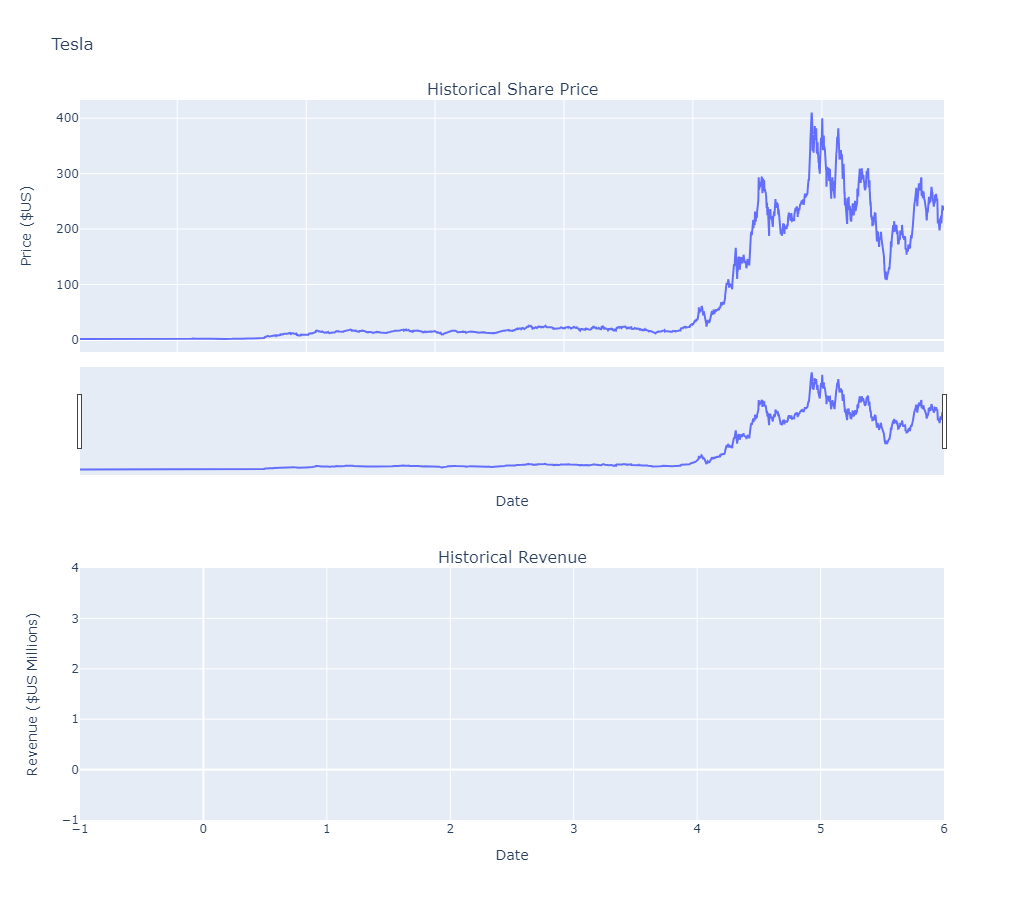

In [89]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

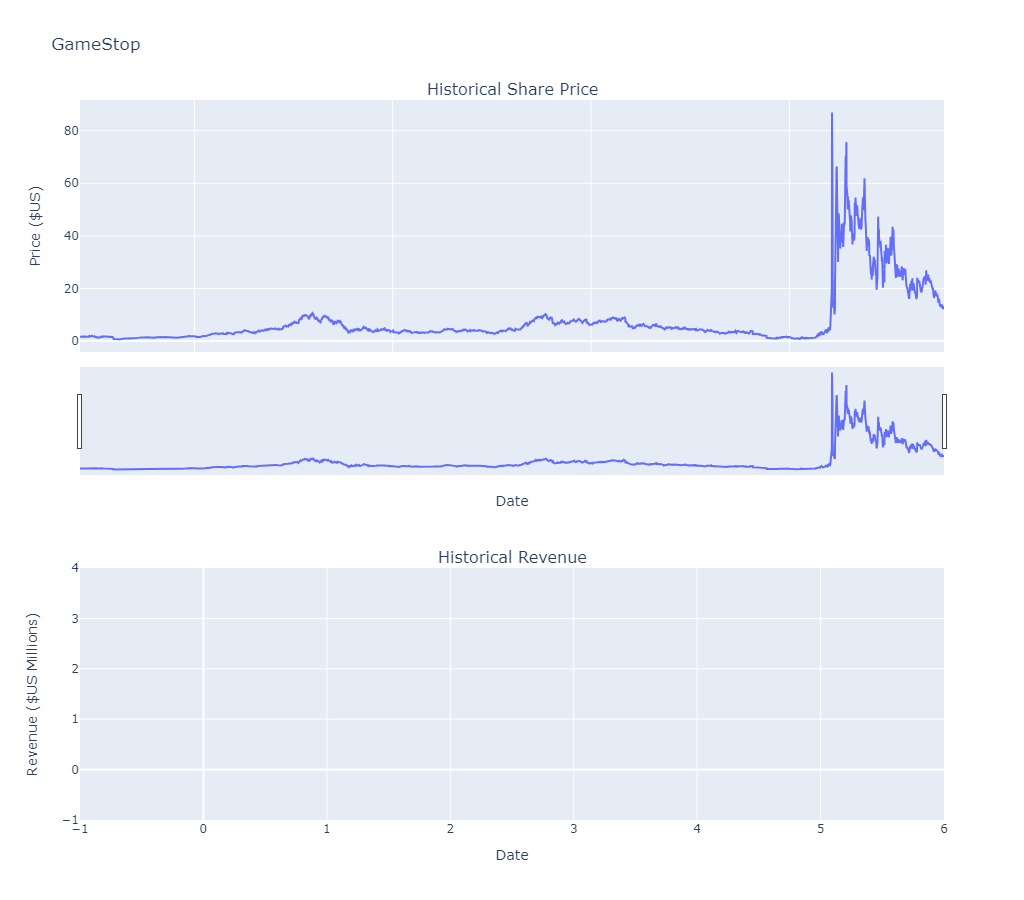

In [90]:
make_graph(gme_data, gme_revenue, 'GameStop')